In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Amazon Sale india.csv',low_memory=False)

In [3]:
df.head()

,index,order_id,parsed_date,status,fulfillment,sales_channel,ship_service_level,style,sku,category,...,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,is_b2b,fulfilled_by,unnamed_cols
0,96150,408-4631753-5605964,2022-06-25,pending,amazon,amazon.in,expedited,BTM003,BTM003-B-L,bottom,...,INR,0.0,MUMBAI SUBUEBAN,Maharashtra,400066.0,IN,NaN,False,NaN,False
1,91239,404-2093011-6135513,2022-06-29,pending,merchant,amazon.in,standard,J0062,J0062-DR-M,western dress,...,INR,475.0,SOUTH 24 PARGANAS,West Bengal,743329.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,easy ship,False
2,91223,407-7926766-7601961,2022-06-29,pending,amazon,amazon.in,expedited,J0097,J0097-KR-M,kurta,...,INR,544.0,MUMBAI SUBUEBAN,Maharashtra,400095.0,IN,NaN,False,NaN,False
3,91459,402-1067136-1825927,2022-06-29,pending,merchant,amazon.in,standard,J0097,J0097-KR-S,kurta,...,INR,544.0,NORTH 24 PARGANAS,West Bengal,700135.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,easy ship,False
4,91662,403-9219853-4911569,2022-06-29,pending,merchant,amazon.in,standard,J0097,J0097-KR-S,kurta,...,INR,544.0,ARARIA,Bihar,854318.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,easy ship,False


In [4]:
df['parsed_date'] = pd.to_datetime(
    df['parsed_date'], 
    errors='coerce'
)

In [5]:
missing = df.isnull().sum()
missing_pct = (missing/len(df)*100).round(3)
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct}).sort_values('missing_pct', ascending=False)
print(missing_df.head(50))

                    missing_count  missing_pct
fulfilled_by                89698       69.547
promotion_ids               49153       38.110
unnamed_cols                49050       38.031
currency                     7795        6.044
amount                       7795        6.044
courier_status               6872        5.328
ship_state                   1081        0.838
ship_city                    1081        0.838
ship_country                   33        0.026
ship_postal_code               33        0.026
sales_channel                   0        0.000
fulfillment                     0        0.000
status                          0        0.000
parsed_date                     0        0.000
order_id                        0        0.000
index                           0        0.000
style                           0        0.000
ship_service_level              0        0.000
qty                             0        0.000
asin                            0        0.000
sku          

In [6]:
critical = ['parsed_date', 'amount', 'qty']
mask_critical_missing = df[critical].isnull().any(axis=1)
df_clean = df[~mask_critical_missing].copy()

In [7]:
fill_vals = {
    'category':'Unknown', 'sku':'Unknown', 'style':'Unknown', 'size':'Unknown',
    'ship_city':'Unknown', 'ship_state':'Unknown', 'ship_country':'Unknown',
    'courier_status':'Unknown', 'fulfilled_by':'Unknown', 'sales_channel':'Unknown',
    'promotion_ids':'None'
}
df_clean = df_clean.fillna(value=fill_vals)
if 'is_b2b' in df_clean.columns:
    df_clean['is_b2b'] = df_clean['is_b2b'].fillna(False)

In [8]:
df_clean.drop(columns=['index','unnamed_cols'], errors='ignore', inplace=True)

In [9]:
df_clean['year'] = df_clean['parsed_date'].dt.year
df_clean['month'] = df_clean['parsed_date'].dt.month
df_clean['month_name'] = df_clean['parsed_date'].dt.month_name().str[:3]
df_clean['quarter'] = df_clean['parsed_date'].dt.quarter
df_clean['month_year'] = df_clean['parsed_date'].dt.to_period('M').astype(str)

In [12]:
df_clean['order_revenue'] = df_clean['qty'] * df_clean['amount']

In [18]:
plt.style.use("ggplot")
sns.set_palette("Set2")

In [19]:
df=pd.read_csv("Cleaned_Amazon_Sale_cleaned_for_analysis.csv")

In [20]:
print("Shape:",df.shape)
print("columns:",df.columns)
print(df.info())
print(df.describe(include="all"))

Shape: (121180, 28)
columns: Index(['order_id', 'parsed_date', 'status', 'fulfillment', 'sales_channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'is_b2b', 'fulfilled_by', 'year', 'month', 'month_name', 'quarter',
       'month_year', 'order_revenue'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121180 entries, 0 to 121179
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            121180 non-null  object 
 1   parsed_date         121180 non-null  object 
 2   status              121180 non-null  object 
 3   fulfillment         121180 non-null  object 
 4   sales_channel       121180 non-null  object 
 5   ship_service_level  121180 non-null  object 
 6   style               121180 no

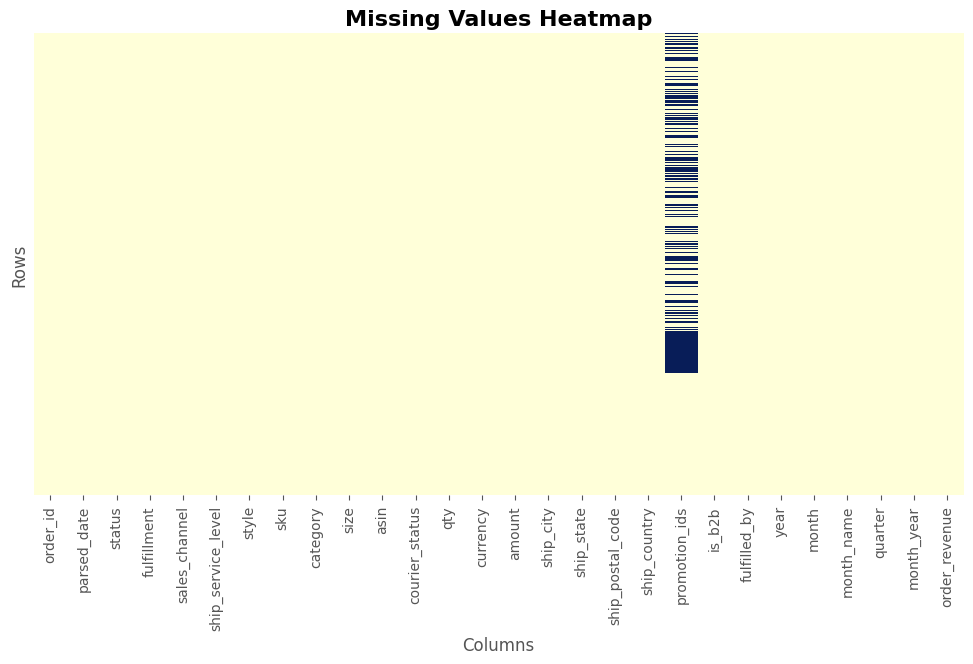

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap="YlGnBu",       
    yticklabels=False
)
plt.title("Missing Values Heatmap", fontsize=16, fontweight="bold")
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()


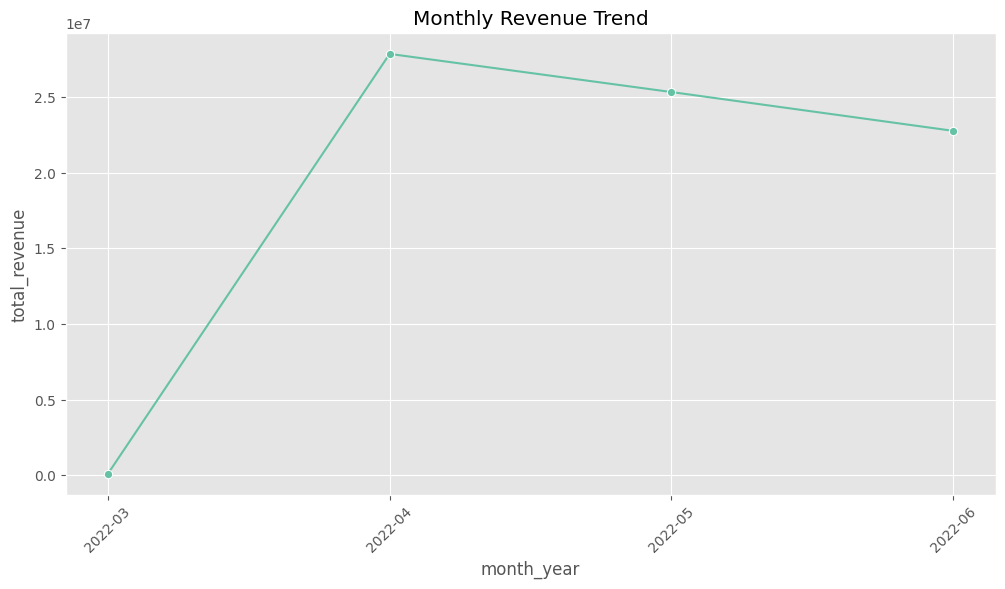

In [22]:
monthly_sales = df.groupby("month_year").agg(
    total_revenue=("order_revenue","sum"),
    total_orders=("order_id","count"),
    total_qty=("qty","sum")
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="month_year", y="total_revenue", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()

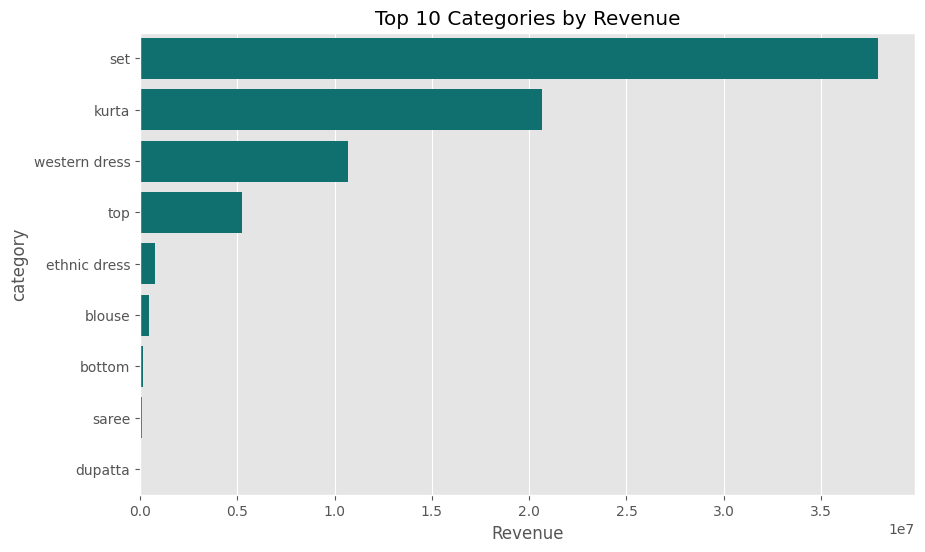

In [23]:
top_categories = df.groupby("category")["order_revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index,color="teal")
plt.title("Top 10 Categories by Revenue")
plt.xlabel("Revenue")
plt.show()

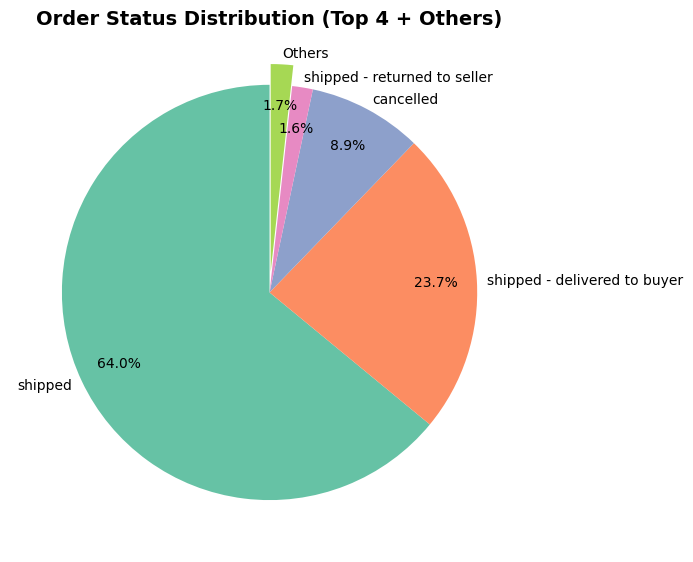

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

status_counts = df["status"].value_counts(normalize=True) * 100
top4 = status_counts[:4]
others = status_counts[4:].sum()
status_counts_mod = pd.concat([top4, pd.Series({"Others": others})])

explode = [0, 0, 0, 0, 0.1]

plt.figure(figsize=(7,7))
plt.pie(
    status_counts_mod.values,
    labels=status_counts_mod.index,
    autopct="%1.1f%%",
    startangle=90,
    explode=explode,
    pctdistance=0.8,
    labeldistance=1.05,
    textprops={'fontsize': 10}
)
plt.title("Order Status Distribution (Top 4 + Others)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


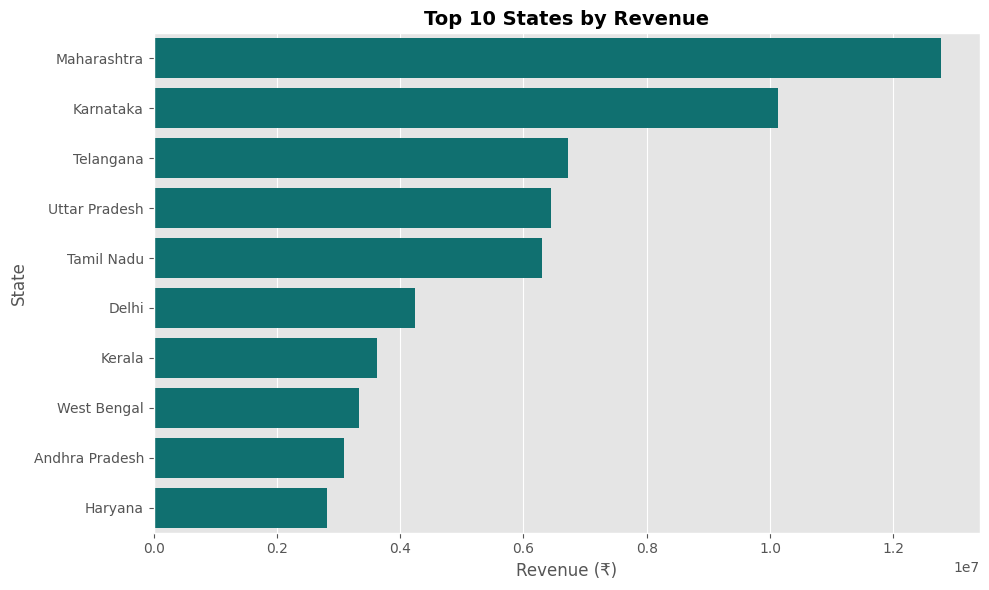

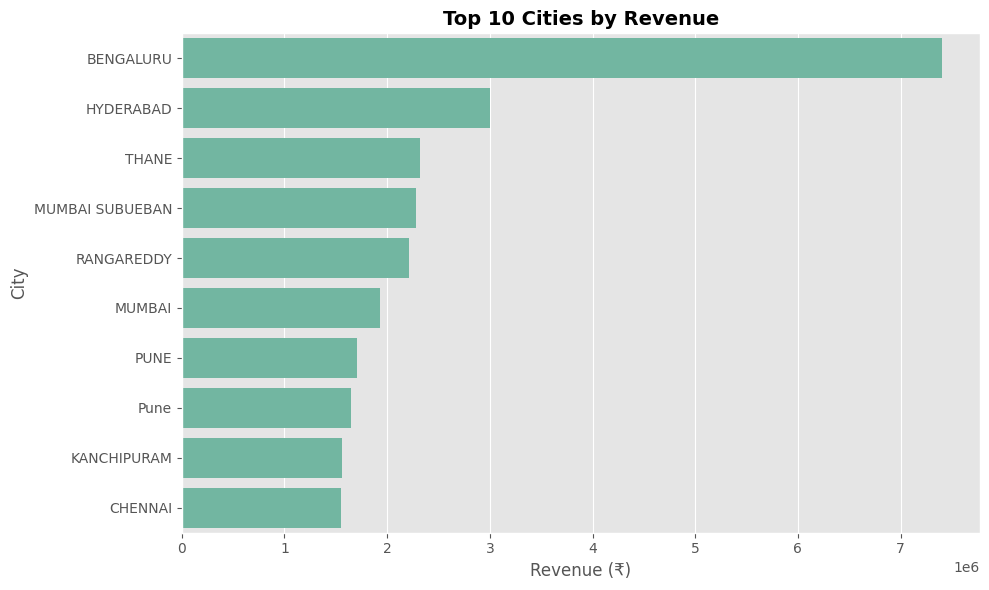

In [25]:
state_sales = df.groupby("ship_state")["order_revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.values, y=state_sales.index, color="teal")
plt.title("Top 10 States by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Revenue (₹)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

city_sales = df.groupby("ship_city")["order_revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=city_sales.values, y=city_sales.index)
plt.title("Top 10 Cities by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Revenue (₹)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()


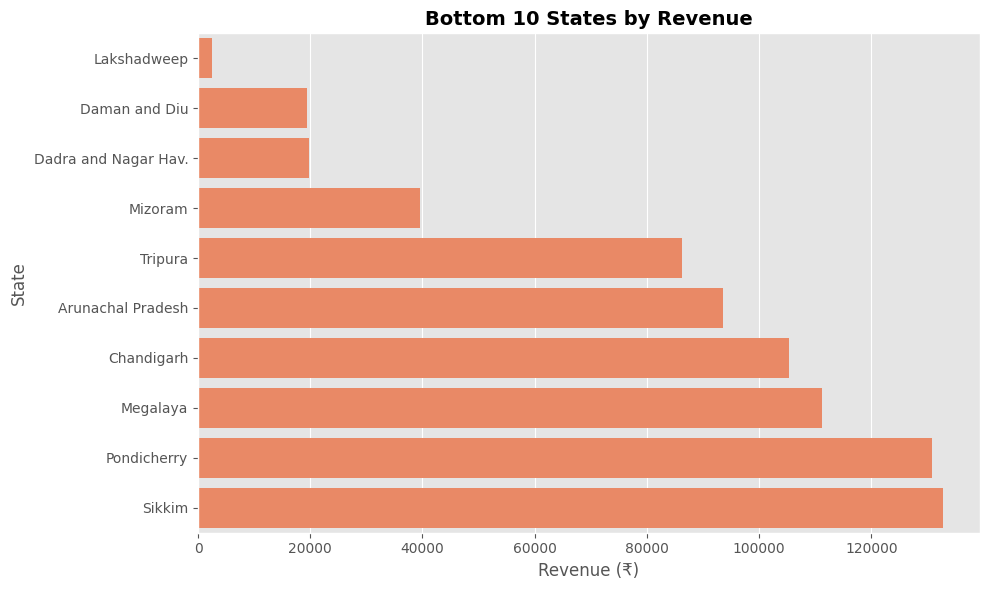

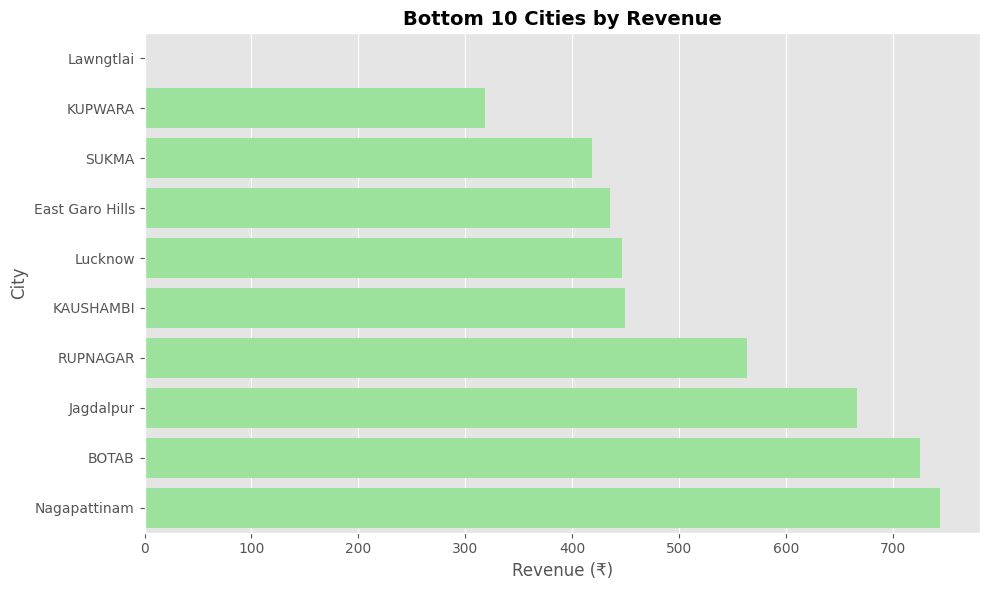

In [26]:
state_sales_bottom = df.groupby("ship_state")["order_revenue"].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=state_sales_bottom.values, y=state_sales_bottom.index, color="coral")
plt.title("Bottom 10 States by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Revenue (₹)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()
city_sales_bottom = df.groupby("ship_city")["order_revenue"].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=city_sales_bottom.values, y=city_sales_bottom.index, color="lightgreen")
plt.title("Bottom 10 Cities by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Revenue (₹)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()

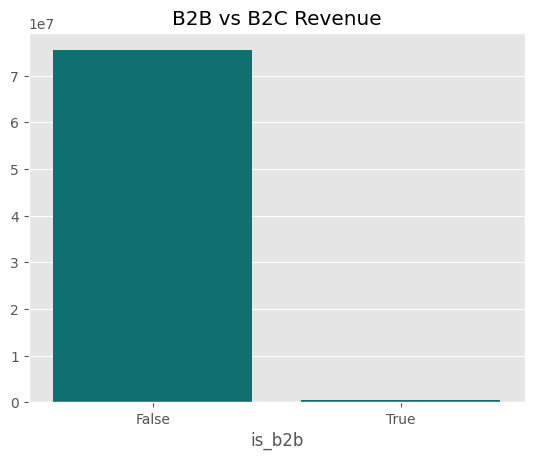

In [27]:
b2b_sales = df.groupby("is_b2b")["order_revenue"].sum()
sns.barplot(x=b2b_sales.index.astype(str), y=b2b_sales.values,color="teal")
plt.title("B2B vs B2C Revenue")
plt.show()

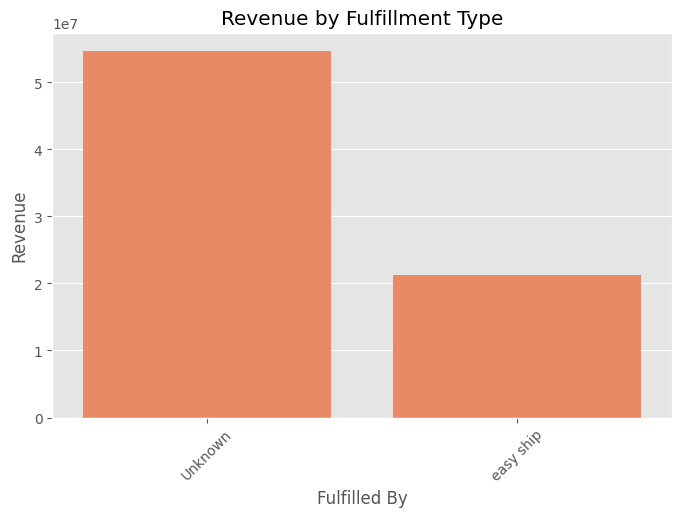

In [28]:
fulfillment_sales = df.groupby("fulfilled_by")["order_revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=fulfillment_sales.index, y=fulfillment_sales.values,color="coral")
plt.title("Revenue by Fulfillment Type")
plt.xlabel("Fulfilled By")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

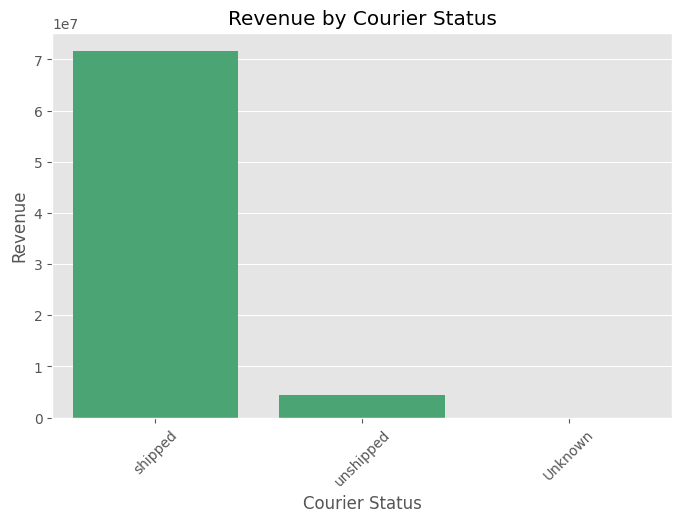

In [29]:
courier_status_sales = df.groupby("courier_status")["order_revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=courier_status_sales.index, y=courier_status_sales.values,color="mediumseagreen")
plt.title("Revenue by Courier Status")
plt.xlabel("Courier Status")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

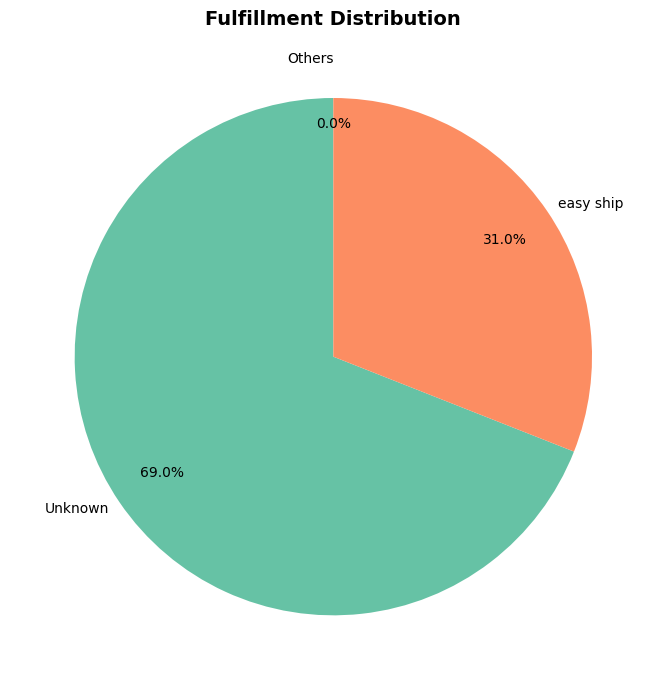

In [30]:
fulfillment_counts = df["fulfilled_by"].value_counts(normalize=True) * 100

top4 = fulfillment_counts[:4]
others = fulfillment_counts[4:].sum()
fulfillment_counts_mod = pd.concat([top4, pd.Series({"Others": others})])

# Create explode list (only last slice "Others" is exploded)
explode = [0]*(len(fulfillment_counts_mod)-1) + [0.1]

plt.figure(figsize=(7,7))
plt.pie(
    fulfillment_counts_mod.values,
    labels=fulfillment_counts_mod.index,
    autopct="%1.1f%%",
    startangle=90,
    explode=explode,
    pctdistance=0.8,
    labeldistance=1.05,
    textprops={'fontsize': 10}
)
plt.title("Fulfillment Distribution", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


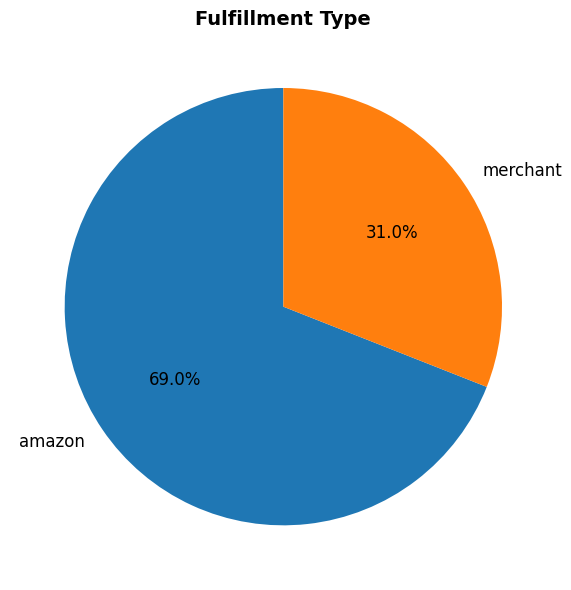

In [31]:
import matplotlib.pyplot as plt

# Count percentage of each fulfillment type
fulfillment_counts = df["fulfillment"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(
    fulfillment_counts.values,
    labels=fulfillment_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#1f77b4", "#ff7f0e"],
    textprops={'fontsize': 12}
)
plt.title("Fulfillment Type", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


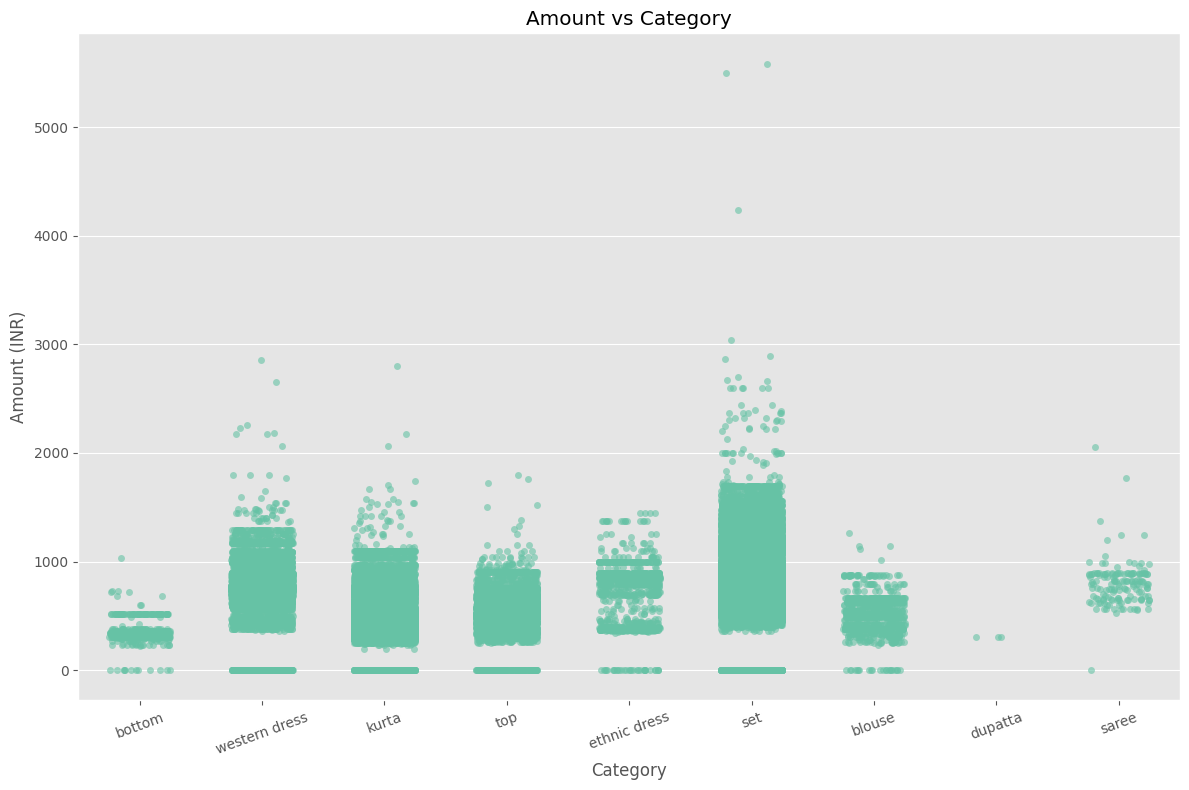

In [32]:
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")

plt.figure(figsize=(12,8))
sns.stripplot(data=df, x="category", y="amount", jitter=0.25, alpha=0.6)
plt.title("Amount vs Category")
plt.xlabel("Category")
plt.ylabel("Amount (INR)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

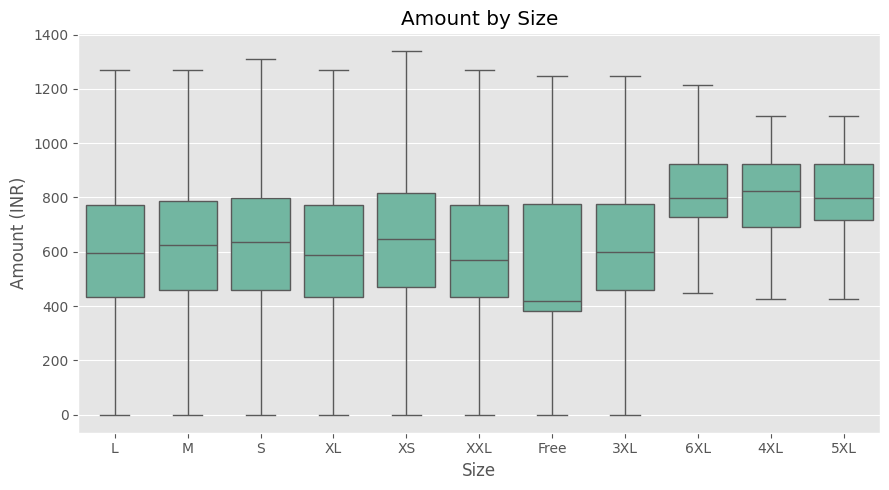

In [33]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="size", y="amount", showfliers=False)
plt.title("Amount by Size")
plt.xlabel("Size")
plt.ylabel("Amount (INR)")
plt.tight_layout()
plt.show()

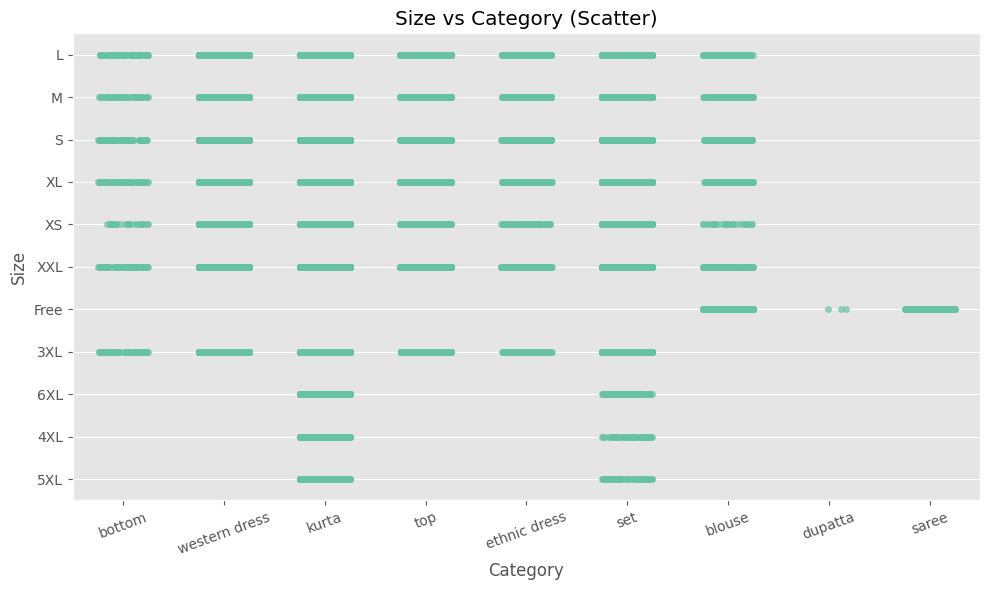

In [34]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x="category", y="size", jitter=0.25, alpha=0.7)
plt.title("Size vs Category (Scatter)")
plt.xlabel("Category")
plt.ylabel("Size")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

C:\Users\Vivek Bari\AppData\Local\Temp\ipykernel_1600\7577126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fulfillment_sales, x="fulfillment", y="order_revenue",palette="inferno")


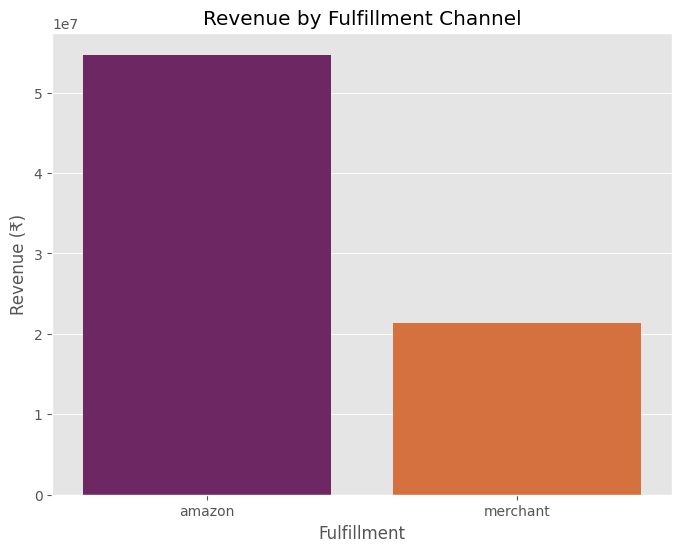

In [56]:
fulfillment_sales = df.groupby("fulfillment")["order_revenue"].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=fulfillment_sales, x="fulfillment", y="order_revenue",palette="inferno")
plt.title("Revenue by Fulfillment Channel")
plt.ylabel("Revenue (₹)")
plt.xlabel("Fulfillment")
plt.show()

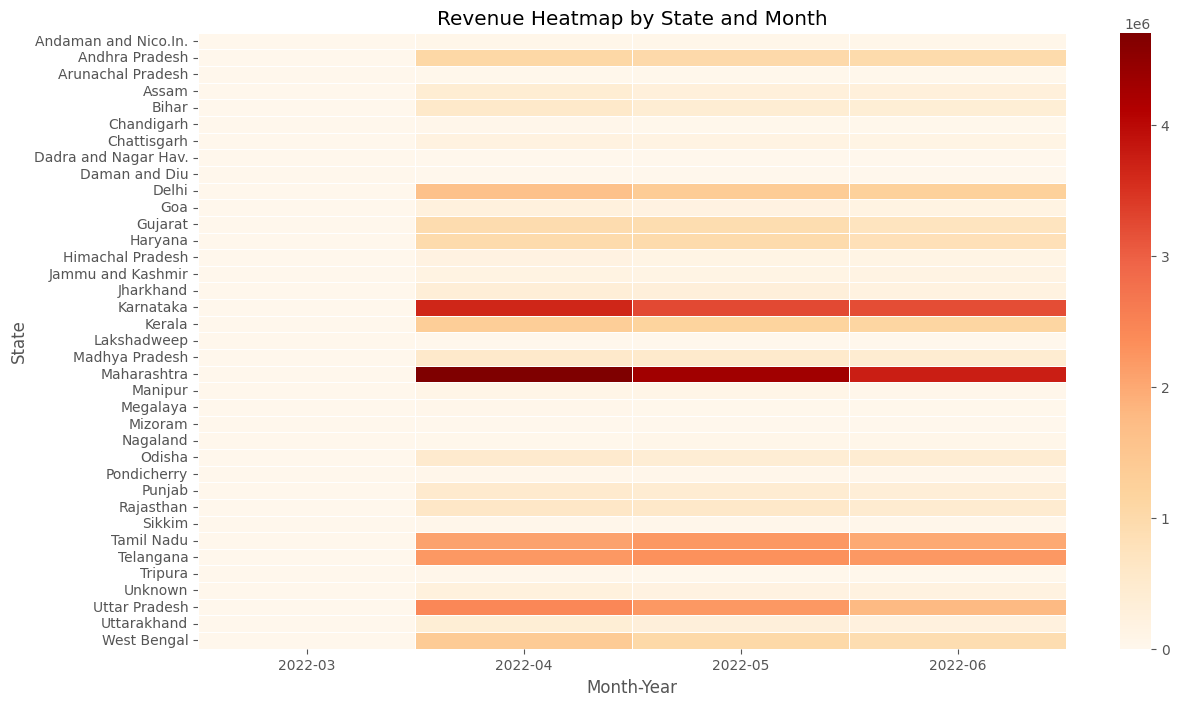

In [46]:
heatmap_data = df.groupby(["ship_state","month_year"])["order_revenue"].sum().unstack().fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="OrRd", linewidths=0.5)
plt.title("Revenue Heatmap by State and Month")
plt.xlabel("Month-Year")
plt.ylabel("State")
plt.show()

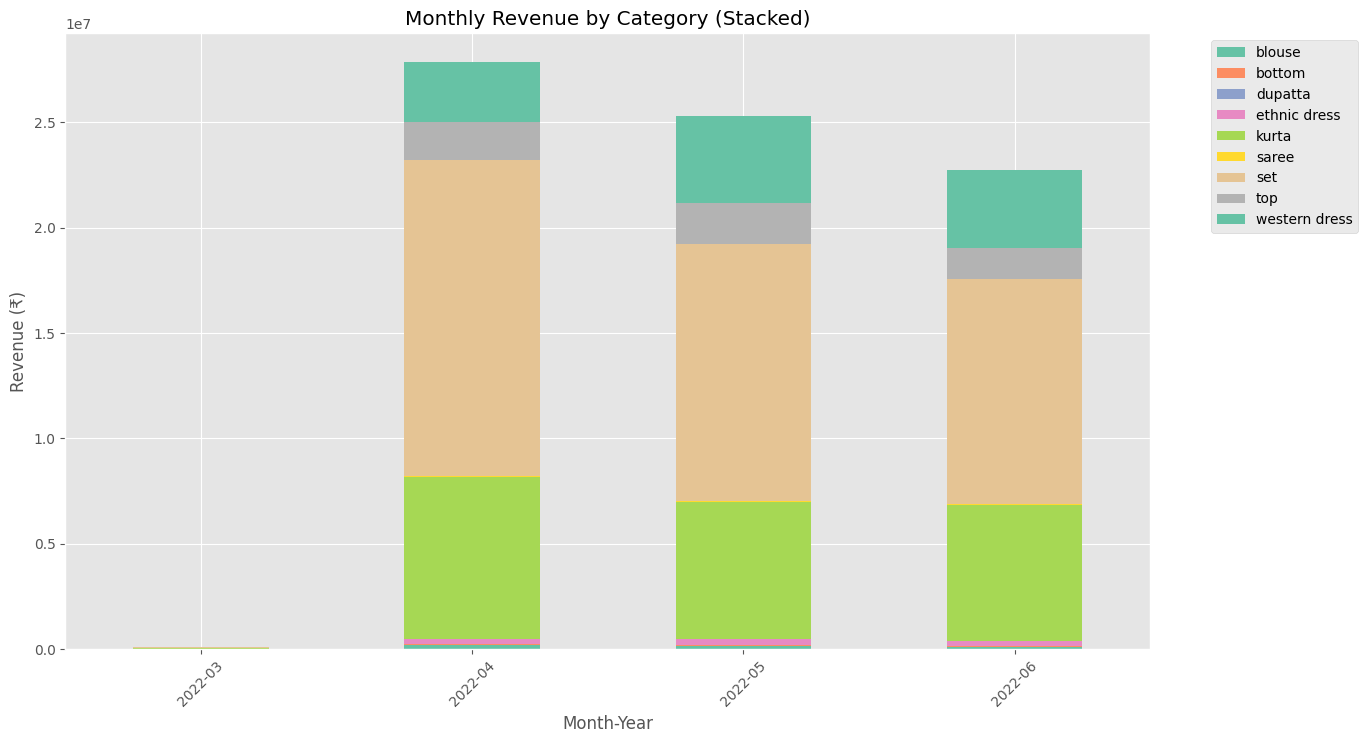

In [43]:
pivot_data = df.groupby(["month_year","category"])["order_revenue"].sum().unstack().fillna(0)

pivot_data.plot(kind="bar", stacked=True, figsize=(14,8))
plt.title("Monthly Revenue by Category (Stacked)")
plt.ylabel("Revenue (₹)")
plt.xlabel("Month-Year")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()